<a href="https://colab.research.google.com/github/vasiliyeskin/Deep-Reinforcement-Learning-Hands-On/blob/master/Chapter02/lunarSimulationOnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Взято с 
https://davidrpugh.github.io/stochastic-expatriate-descent/openai/binder/google-colab/2020/04/16/remote-rendering-gym-envs.html

In [1]:
!apt-get install -y xvfb x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,977 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 993 kB in 0s (10.2 MB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 144487 files

In [2]:
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

     |████████████████████████████████| 542kB 8.8MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593651 sha256=90b629158cb453501731efee1f289249bbe07c93102bc67e8b699990e8032e03
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate


In [3]:
!pip install gym[box2d]==0.17.* 

     |████████████████████████████████| 450kB 8.3MB/s 


In [4]:
!echo $DISPLAY

In [5]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [6]:
!echo $DISPLAY

:1001


In [7]:
import typing

import numpy as np


# represent states as arrays and actions as ints
State = np.array
Action = int

# agent is just a function! 
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)

In [8]:
import gym
import matplotlib.pyplot as plt
from IPython import display


def simulate(agent: Agent, env: gym.Env) -> None:
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()

In [12]:
lunar_lander_v2 = gym.make('LunarLander-v2')
lunar_lander_v2 = gym.wrappers.Monitor(lunar_lander_v2, "recording", force=True)
_ = lunar_lander_v2.seed(42)

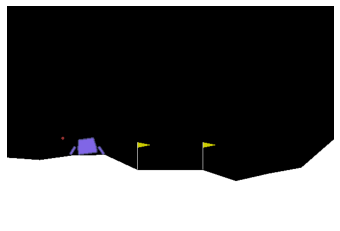

In [13]:
random_agent = make_random_agent(lunar_lander_v2.action_space.n, random_state=None)
simulate(random_agent, lunar_lander_v2)